# Pandas

In [69]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

pd.options.display.max_rows = 10

## Series
one dimensional array-like object containing an array
of data and an associated array of data labels, called its index.

(a fixed-length, ordered dict)

In [4]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [7]:
obj.values, obj.index

(array([ 4,  7, -5,  3]), RangeIndex(start=0, stop=4, step=1))

In [9]:
# to attach an index

obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [20]:
obj2[['a']] #Object

a   -5
dtype: int64

In [21]:
obj2['a']   #value correspondinf to index 'a'

-5

In [23]:
obj2[obj2 > 0]

d    4
b    7
c    3
dtype: int64

In [25]:
np.exp(obj2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [26]:
'b' in obj2

True

### Create Series from a Dict

In [31]:
sdata = {'Ohio': 3500, 'Texas': 7100, 'Utah':5000}

In [37]:
obj3 = Series(sdata)
obj3

Ohio     3500
Texas    7100
Utah     5000
dtype: int64

In [52]:
# with different index

states = ['NY', 'Utah', 'Texas']
obj4 = Series(sdata, index=states)
obj4

NY          NaN
Utah     5000.0
Texas    7100.0
dtype: float64

### .isnull(), .notnull()

In [53]:
obj4.isnull()

NY        True
Utah     False
Texas    False
dtype: bool

## Arithmetic operations

In [54]:
obj3 + obj4

NY           NaN
Ohio         NaN
Texas    14200.0
Utah     10000.0
dtype: float64

In [55]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
NY          NaN
Utah     5000.0
Texas    7100.0
Name: population, dtype: float64

In [56]:
obj4.index = ['a','b','c']
obj4

a       NaN
b    5000.0
c    7100.0
Name: population, dtype: float64

## DataFrame
a tabular spreadsheet-like data structure containing an ordered
collection of columns.

In [57]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
           'year': [2000, 2001, 2002, 2001, 2002],
           'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = DataFrame(data)

In [58]:
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [60]:
# specify the columns order 

DataFrame(data, columns= ['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [64]:
frame2 = DataFrame(data, columns= ['year', 'state', 'pop', 'debt'], 
                          index =['one', 'two', 'three', 'four', 'five'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [69]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [78]:
# Select colums

frame2['state'][:3]

one      Ohio
two      Ohio
three    Ohio
Name: state, dtype: object

In [79]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

### .ix
indexing field

In [84]:
# Select rows

frame2.ix['five']

year       2002
state    Nevada
pop         2.9
debt        NaN
Name: five, dtype: object

In [86]:
frame2.debt = np.arange(5)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4


In [87]:
# Assign values using Series

val = Series([-1.2, -1.5, -1.7], index = ['two', 'four', 'five'])
frame2.debt = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [103]:
# if the columns doesn't exist, it'll be created

frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


### del column

In [104]:
del frame2['eastern']

In [105]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


## Nested dict of dicts 

In [17]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9}, 
          'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [18]:
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [118]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [121]:
DataFrame(pop, index =[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


## Dicts of Series

In [125]:
pdata = {'Ohio': frame3['Ohio'][:-1],
            'Nevada': frame3['Nevada'][:1]}
pdata

{'Nevada': 2000   NaN
 Name: Nevada, dtype: float64, 'Ohio': 2000    1.5
 2001    1.7
 Name: Ohio, dtype: float64}

In [127]:
DataFrame(pdata)

,Nevada,Ohio
2000,NaN,1.5
2001,NaN,1.7


In [128]:
frame3.index.name = 'year'; frame3.columns.name = 'state'

In [129]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [131]:
frame3.values

array([[ nan,  1.5],
       [ 2.4,  1.7],
       [ 2.9,  3.6]])

In [133]:
#columns of different types

frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7]], dtype=object)

## Index Objects

In [3]:
obj = Series(range(3), index =['a', 'b', 'c'])
index = obj.index

In [5]:
# Index objects are immutable

index

Index(['a', 'b', 'c'], dtype='object')

In [13]:
index = pd.Index(np.arange(3))
index

Int64Index([0, 1, 2], dtype='int64')

In [14]:
obj2 = Series([1.4, 2.3, 0], index=index)

In [15]:
obj2.index is index

True

In [19]:
# an Index als functions as a fixed-size set

frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [20]:
'Ohio' in frame3.columns

True

In [21]:
2003 in frame3.index

False

# Essential Functionality

### reindex
arranges the data according to the new index, introducing missing values

In [22]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [25]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

### method (ffill)
interpolation

In [27]:
# It may be desirable to do some interpolation of filling of values when reindexing

obj3 = Series(['blue', 'purple', 'yellow'], index= [0, 2, 4])

In [29]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [30]:
# reindex can alter either the (row) index, columsn or both

frame = DataFrame(np.arange(9).reshape(3, 3), index= ['a', 'b', 'd'],
                     columns= ['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
b,3,4,5
d,6,7,8


In [32]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,3.0,4.0,5.0
c,NaN,NaN,NaN
d,6.0,7.0,8.0


In [37]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
b,4,NaN,5
d,7,NaN,8


In [40]:
frame.reindex(index =['a', 'b', 'c', 'd'], method='ffill', columns= states)

,Texas,Utah,California
a,1,NaN,2
b,4,NaN,5
c,4,NaN,5
d,7,NaN,8


### ix
indexing field

In [41]:
frame.ix[['a', 'b', 'c', 'd'], states]

,Texas,Utah,California
a,1.0,NaN,2.0
b,4.0,NaN,5.0
c,NaN,NaN,NaN
d,7.0,NaN,8.0


## Droping entries from an axis

### drop

In [42]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])

In [44]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [45]:
data = DataFrame(np.arange(16).reshape(4, 4), 
                    index =['Ohio', 'Colorado', 'Utah', 'NY'],
                    columns =['one', 'two', 'three', 'four'])

In [46]:
data.drop(['Colorado', 'Utah'])

,one,two,three,four
Ohio,0,1,2,3
NY,12,13,14,15


In [48]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
NY,12,14,15


In [49]:
data.drop(['two', 'four'], axis=1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
NY,12,14


## Indexing, selection and filtering
works analogously to NumPy

In [50]:
obj = Series(np.arange(4), index=['a', 'b', 'c', 'd'])

In [53]:
obj['b']

1

In [54]:
obj[2:4]

c    2
d    3
dtype: int64

In [55]:
obj[[1, 3]]

b    1
d    3
dtype: int64

In [57]:
obj[obj > 2]

d    3
dtype: int64

In [58]:
obj['b':'c']

b    1
c    2
dtype: int64

In [59]:
obj['b':'c'] = 5
obj

a    0
b    5
c    5
d    3
dtype: int64

In [60]:
data = DataFrame(np.arange(16).reshape(4, 4), 
                    index =['Ohio', 'Colorado', 'Utah', 'NY'],
                    columns =['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
NY,12,13,14,15


In [61]:
data['two']

Ohio         1
Colorado     5
Utah         9
NY          13
Name: two, dtype: int64

In [62]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
NY,14,12


In [63]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [64]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
NY,12,13,14,15


In [65]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
NY,False,False,False,False


### .ix
indexing field

In [66]:
data.ix['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

In [67]:
data.ix[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [68]:
data.ix[data.three >  5, :3]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
NY,12,13,14


## Arithmetic

In [8]:
s1 = Series([4., 2., 4., 9.], index = ['a', 'c', 'd', 'e'])
s2 = Series([-2.3, 3.2, 3.2, 0.4, 1], index = ['a', 'c', 'e', 'f', 'g'])

In [10]:
s1 + s2

a     1.7
c     5.2
d     NaN
e    12.2
f     NaN
g     NaN
dtype: float64

In [15]:
# In the case of DataFrame

df1 = DataFrame(np.arange(9).reshape(3, 3), columns= list('abc'),
                   index =['Ohio', 'Texas', 'Colorado'])
df2 = DataFrame(np.arange(12).reshape(4, 3), columns=list('bde'), 
                   index= ['Utah', 'Ohio', 'Texas', 'Orego'])

In [16]:
df1

,a,b,c
Ohio,0,1,2
Texas,3,4,5
Colorado,6,7,8


In [17]:
df2

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Orego,9,10,11


In [18]:
df1 + df2

,a,b,c,d,e
Colorado,NaN,NaN,NaN,NaN,NaN
Ohio,NaN,4.0,NaN,NaN,NaN
Orego,NaN,NaN,NaN,NaN,NaN
Texas,NaN,10.0,NaN,NaN,NaN
Utah,NaN,NaN,NaN,NaN,NaN


### fill_value

In [22]:
df1 = DataFrame(np.arange(12).reshape(3, 4), columns= list('abcd'))
df2 = DataFrame(np.arange(20).reshape(4, 5), columns= list('abcde')) 

In [23]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [24]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [26]:
# when reindexing

df1.reindex(columns = df2.columns)

,a,b,c,d,e
0,0,1,2,3,NaN
1,4,5,6,7,NaN
2,8,9,10,11,NaN


In [27]:
df1.reindex(columns = df2.columns, fill_value=0)

,a,b,c,d,e
0,0,1,2,3,0
1,4,5,6,7,0
2,8,9,10,11,0


## Operations between DataFrame and Series

### broadcasting

In [28]:
arr = np.arange(12).reshape(3, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [29]:
arr - arr[0]

array([[0, 0, 0, 0],
       [4, 4, 4, 4],
       [8, 8, 8, 8]])

In [35]:
frame = DataFrame(np.arange(12).reshape(4, 3), columns =list('bde'),
                     index =['Utah', 'Ohio', 'Texas', 'Orego'])
frame

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Orego,9,10,11


In [34]:
series = frame.ix[0]
series

b    0
d    1
e    2
Name: Utah, dtype: int64

In [36]:
frame - series

,b,d,e
Utah,0,0,0
Ohio,3,3,3
Texas,6,6,6
Orego,9,9,9


In [39]:
# If you want to broadcast over the colums

series3 = frame['d']
series3

Utah      1
Ohio      4
Texas     7
Orego    10
Name: d, dtype: int64

In [40]:
frame.sub(series3, axis= 0)

,b,d,e
Utah,-1,0,1
Ohio,-1,0,1
Texas,-1,0,1
Orego,-1,0,1


,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Orego,9,10,11


## Function application and mapping
Numpy functions work fine with pandas object

In [43]:
frame = DataFrame(np.random.randn(4, 3), columns =list('bde'),
                     index =['Utah', 'Ohio', 'Texas', 'Orego'])
frame

,b,d,e
Utah,-1.702298,-0.729468,0.696094
Ohio,0.782241,-1.547337,-0.573393
Texas,1.238066,0.317191,-1.200809
Orego,-0.756588,2.512817,0.663570


In [44]:
np.abs(frame)

,b,d,e
Utah,1.702298,0.729468,0.696094
Ohio,0.782241,1.547337,0.573393
Texas,1.238066,0.317191,1.200809
Orego,0.756588,2.512817,0.663570


In [48]:
f= lambda x: x.max() - x.min()

### apply method

In [52]:
frame.apply(f)

b    2.940364
d    4.060153
e    1.896903
dtype: float64

In [53]:
frame.apply(f, axis=1)

Utah     2.398391
Ohio     2.329578
Texas    2.438875
Orego    3.269405
dtype: float64

In [54]:
def f(x):
    return Series([x.min(), x.max()], index = ['min', 'max'])

In [55]:
frame.apply(f)

,b,d,e
min,-1.702298,-1.547337,-1.200809
max,1.238066,2.512817,0.696094


### applymap
element-wise

In [56]:
format = lambda x: '%.2f' % x

In [59]:
frame.applymap(format)

,b,d,e
Utah,-1.70,-0.73,0.70
Ohio,0.78,-1.55,-0.57
Texas,1.24,0.32,-1.20
Orego,-0.76,2.51,0.66


In [60]:
frame['e'].map(format)

Utah      0.70
Ohio     -0.57
Texas    -1.20
Orego     0.66
Name: e, dtype: object

## Sorting and ranking

### sort_index method

In [61]:
obj = Series(range(4), index = ['d', 'a', 'b', 'c'])

In [62]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [63]:
frame = DataFrame(np.arange(8).reshape(2, 4), index=['three', 'one'],
                     columns= ['d', 'a', 'b', 'c'])

In [64]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [65]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [66]:
# Sortind in descending order

frame.sort_index(axis=1, ascending = False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


### order
sort_values

In [67]:
obj = Series([4, 7, -3, 2])

In [69]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [71]:
# When missing values are present

obj = Series([4, np.nan, 7, np.nan, -3, 2])

In [72]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [73]:
frame = DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [77]:
# to sort columns

frame.sort_values(by= 'b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [78]:
frame.sort_values(by = ['a', 'b'])

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


### rank method
ranking is closely realted to sorting: but it breaks ties by assigning each group the mean rank

In [79]:
obj = Series([7, -5, 7, 4, 2, 0, 4])

In [80]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [83]:
# according to the order they're observed in the data

obj.rank(method= 'first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [84]:
# in descending order

obj.rank( ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [85]:
frame = DataFrame({'b': [4.3, 4, -3, 2], 'a': [0, 1, 0, 1], 
                      'c': [-2, 5, 8, -2.5]})
frame

,a,b,c
0,0,4.3,-2.0
1,1,4.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [87]:
frame.rank(axis=1)

,a,b,c
0,2.0,3.0,1.0
1,1.0,2.0,3.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


## Axis indexes with duplicate values

In [89]:
obj = Series(range(5), index = ['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [90]:
obj.index.is_unique

False

In [91]:
obj['a']

a    0
a    1
dtype: int64

In [92]:
df = DataFrame(np.random.randn(4, 3) , index = ['a', 'a', 'b', 'b'])

In [94]:
df.ix['b']

,0,1,2
b,0.890856,-0.241552,0.458379
b,-0.325716,0.433833,0.195558


## Computing Descriptive Statistics

In [3]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5], 
                    [np.nan, np.nan], [0.75, -1.3]], 
                  index=['a', 'b', 'c', 'd'], columns = ['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [4]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [5]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

### skipna

In [6]:
df.mean(axis = 1, skipna = False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

### idxmin, idxmax

In [9]:
df.idxmin()

one    d
two    b
dtype: object

### accumulations

In [10]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


### describe

In [11]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [13]:
# On non-numeric-dat

obj = Series(['a', 'a', 'b', 'c']*4)

In [14]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

## Correlation and Covariance

In [62]:
import pandas.io.data as web

In [37]:
all_data = {}
for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']:
    all_data[ticker] = web.get_data_yahoo(ticker)

In [33]:
price = DataFrame({tic: data['Adj Close'] for tic, data in all_data.items()})
volume = DataFrame({tic: data['Volume'] for tic, data in all_data.items()})

In [39]:
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-04-22,-0.002737,-0.053179,-0.005358,-0.071710
2016-04-25,-0.005677,0.006094,0.002088,0.006373
2016-04-26,-0.006947,-0.020756,0.001814,-0.012857
2016-04-27,-0.062578,-0.003248,0.009324,-0.009720
2016-04-28,-0.030566,-0.020996,-0.022596,-0.020416


### corr, cov

In [40]:
returns.MSFT.corr(returns.IBM)

0.49435383397487709

In [41]:
returns.MSFT.cov(returns.IBM)

8.9771958168328864e-05

In [42]:
returns.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.407526,0.387751,0.395076
GOOG,0.407526,1.000000,0.400016,0.462501
IBM,0.387751,0.400016,1.000000,0.494354
MSFT,0.395076,0.462501,0.494354,1.000000


In [43]:
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.000286,0.000112,0.000080,0.000099
GOOG,0.000112,0.000263,0.000079,0.000111
IBM,0.000080,0.000079,0.000149,0.000090
MSFT,0.000099,0.000111,0.000090,0.000221


### corrwith
pair-wise correlations between a DataFrame's colums or rows with another
Series or DataFrame

In [44]:
returns.corrwith(returns.IBM)

AAPL    0.387751
GOOG    0.400016
IBM     1.000000
MSFT    0.494354
dtype: float64

In [47]:
returns.corrwith(volume)

AAPL   -0.079616
GOOG   -0.004106
IBM    -0.206886
MSFT   -0.093043
dtype: float64

## Unique values, value counts, membership

In [48]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [50]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [51]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [52]:
pd.value_counts(obj.values, sort=False)

a    3
c    3
b    2
d    1
dtype: int64

In [54]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [55]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

### value_counts

In [59]:
# to compute a histogram on multiple related columns in a DataFrame

data = DataFrame({'Qu1': [1,3,4,3,4],
                 'Qu2': [2,3,1,2,3],
                 'Qu3': [1,5,2,4,4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [62]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


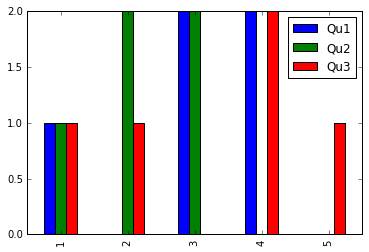

In [65]:
%matplotlib inline
result.plot(kind='bar')

## Handling missing data

In [3]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [5]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [6]:
string_data[0] = None

In [7]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

### Filtering out Missing data

### dropna

In [8]:
from numpy import nan as NA

In [9]:
data = Series([1, NA, 3.5, NA, 7])

In [10]:
# = data[data.notnull()]

data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [12]:
data =DataFrame([[1., 5.6, 3.], [1, NA, NA], 
                   [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,5.6,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [13]:
data.dropna()

,0,1,2
0,1.0,5.6,3.0


### how='all'
only drop rows that are all NA

In [15]:
data.dropna(how = 'all')

,0,1,2
0,1.0,5.6,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [17]:
# Droping columns

data[4] = NA
data

,0,1,2,4
0,1.0,5.6,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [18]:
data.dropna(axis =1, how='all')

,0,1,2
0,1.0,5.6,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


### thresh
keep rows containing a certain number of observations

In [19]:
df = DataFrame(np.random.rand(7, 3))
df

,0,1,2
0,0.571867,0.145732,0.424709
1,0.687845,0.336539,0.215066
2,0.998269,0.118364,0.459211
3,0.032319,0.887072,0.534793
4,0.674230,0.604341,0.921974
5,0.819432,0.417009,0.265412
6,0.391873,0.667832,0.675651


In [21]:
df.ix[:4, 1] = NA; df.ix[:2, 2] = NA

In [22]:
df

,0,1,2
0,0.571867,NaN,NaN
1,0.687845,NaN,NaN
2,0.998269,NaN,NaN
3,0.032319,NaN,0.534793
4,0.674230,NaN,0.921974
5,0.819432,0.417009,0.265412
6,0.391873,0.667832,0.675651


In [25]:
df.dropna(thresh=2)

,0,1,2
3,0.032319,NaN,0.534793
4,0.674230,NaN,0.921974
5,0.819432,0.417009,0.265412
6,0.391873,0.667832,0.675651


## Filling Missing Data

### fillna

In [26]:
df.fillna(0)

,0,1,2
0,0.571867,0.000000,0.000000
1,0.687845,0.000000,0.000000
2,0.998269,0.000000,0.000000
3,0.032319,0.000000,0.534793
4,0.674230,0.000000,0.921974
5,0.819432,0.417009,0.265412
6,0.391873,0.667832,0.675651


In [29]:
# use a different fill value for each column

df.fillna({1: 0.5, 3: -1})

,0,1,2
0,0.571867,0.500000,NaN
1,0.687845,0.500000,NaN
2,0.998269,0.500000,NaN
3,0.032319,0.500000,0.534793
4,0.674230,0.500000,0.921974
5,0.819432,0.417009,0.265412
6,0.391873,0.667832,0.675651


In [32]:
# fillna returns a new object, but you can 
#modify the existing object

_ = df.fillna(0, inplace=True)

In [33]:
df

,0,1,2
0,0.571867,0.000000,0.000000
1,0.687845,0.000000,0.000000
2,0.998269,0.000000,0.000000
3,0.032319,0.000000,0.534793
4,0.674230,0.000000,0.921974
5,0.819432,0.417009,0.265412
6,0.391873,0.667832,0.675651


### interpolation methods

In [36]:
df = DataFrame(np.random.rand(6, 3))
df.ix[2:,1] = NA; df.ix[4:, 2] = NA
df

,0,1,2
0,0.440030,0.942909,0.390700
1,0.338224,0.657735,0.457466
2,0.596110,NaN,0.124546
3,0.585392,NaN,0.692310
4,0.153977,NaN,NaN
5,0.775935,NaN,NaN


In [37]:
df.fillna(method ='ffill')

,0,1,2
0,0.440030,0.942909,0.390700
1,0.338224,0.657735,0.457466
2,0.596110,0.657735,0.124546
3,0.585392,0.657735,0.692310
4,0.153977,0.657735,0.692310
5,0.775935,0.657735,0.692310


In [38]:
df.fillna(method ='ffill', limit=2)

,0,1,2
0,0.440030,0.942909,0.390700
1,0.338224,0.657735,0.457466
2,0.596110,0.657735,0.124546
3,0.585392,0.657735,0.692310
4,0.153977,NaN,0.692310
5,0.775935,NaN,0.692310


In [39]:
data = Series([1, NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

# Hierarchical Indexing

In [4]:
data = Series(np.random.rand(10), 
                 index =[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
                 [1, 2,3, 1, 2,3, 1, 2,2, 3]])
data

a  1    0.527096
   2    0.919174
   3    0.877325
b  1    0.062808
   2    0.144843
   3    0.605347
c  1    0.593008
   2    0.629646
d  2    0.019268
   3    0.600728
dtype: float64

In [5]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 1, 2]])

In [14]:
data['b':'c']

b  1    0.062808
   2    0.144843
   3    0.605347
c  1    0.593008
   2    0.629646
dtype: float64

In [10]:
data.ix[['b', 'd']]

b  1    0.062808
   2    0.144843
   3    0.605347
d  2    0.019268
   3    0.600728
dtype: float64

In [15]:
data[:, 2]

a    0.919174
b    0.144843
c    0.629646
d    0.019268
dtype: float64

In [17]:
# arrange it into a DataFrame

data.unstack()

,1,2,3
a,0.527096,0.919174,0.877325
b,0.062808,0.144843,0.605347
c,0.593008,0.629646,NaN
d,NaN,0.019268,0.600728


In [18]:
data.unstack().stack()

a  1    0.527096
   2    0.919174
   3    0.877325
b  1    0.062808
   2    0.144843
   3    0.605347
c  1    0.593008
   2    0.629646
d  2    0.019268
   3    0.600728
dtype: float64

### Either axis can have a hierarchical index

In [22]:
frame = DataFrame(np.arange(12).reshape((4,3)),
                     index = [['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns = [['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [24]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [25]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

### MultiIndex

In [26]:
pd.MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']],
                             names =['state', 'color'])

MultiIndex(levels=[['Colorado', 'Ohio'], ['Green', 'Red']],
           labels=[[1, 1, 0], [0, 1, 0]],
           names=['state', 'color'])

### Reordering and Sorting Levels

### swaplevel

In [27]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

### sortlevel

In [35]:
frame.sortlevel(1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [29]:
frame.swaplevel(0,1).sortlevel(1)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

## Summary Statistics by Level

### level
you can specify the level you want to (sum) by on a particular axis

In [36]:
frame.sum(level = 'key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [41]:
frame.sum(level = 'color', axis= 1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

## Using a DataFrame's Columns

In [44]:
frame = DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one','one', 'two', 'two', 'two', 'two'],
                      'd': [0,1,2,0,1,2,3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


### set_index

In [46]:
frame2 =  frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [47]:
# but still leave the colums

frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

### reset_index

In [48]:
# and the opposite, move an index to the colums

frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


# Other pandas Topics 

### iloc
usually used when you have integers as index to avoid confusion 

In [52]:
ser3 = Series(range(3), index=[-5, 1, 3])
ser3.iloc[2]

2

In [53]:
frame = DataFrame(np.arange(6).reshape(3, 2), index =[2, 0, 1])

In [58]:
frame.iloc[0]

0    0
1    1
Name: 2, dtype: int64

In [59]:
frame.iloc[:, 0]

2    0
0    2
1    4
Name: 0, dtype: int64

## Panel data
three dimensional analogue of DataFrame

In [63]:
import pandas.io.data as web

In [72]:
pdata = pd.Panel(dict((stk, web.get_data_yahoo(stk))
                     for stk in ['AAPL', 'GOOG', 'MSFT', 'DELL']))
pdata

<class 'pandas.core.panel.Panel'>
Dimensions: 4 (items) x 1611 (major_axis) x 6 (minor_axis)
Items axis: AAPL to MSFT
Major_axis axis: 2010-01-04 00:00:00 to 2016-04-28 00:00:00
Minor_axis axis: Open to Adj Close

In [73]:
pdata = pdata.swapaxes('items', 'minor')

In [74]:
pdata['Adj Close']

,AAPL,DELL,GOOG,MSFT
Date,,,,
2010-01-04,28.313195,14.06528,313.062468,26.227603
2010-01-05,28.362145,14.38450,311.683844,26.236076
2010-01-06,27.911008,14.10397,303.826685,26.075067
2010-01-07,27.859412,14.23940,296.753749,25.803894
2010-01-08,28.044630,14.36516,300.709808,25.981851
...,...,...,...,...
2016-04-22,105.680000,NaN,718.770020,51.779999
2016-04-25,105.080002,NaN,723.150024,52.110001
2016-04-26,104.349998,NaN,708.140015,51.439999


In [76]:
pdata.ix[:, '6/1/2012', :]

,Open,High,Low,Close,Volume,Adj Close
AAPL,569.159996,572.650009,560.520012,560.989983,130246900.0,74.218116
DELL,12.150000,12.300000,12.045000,12.070000,19397600.0,11.675920
GOOG,571.790972,572.650996,568.350996,570.981000,6138700.0,285.205295
MSFT,28.760000,28.959999,28.440001,28.450001,56634300.0,25.598227


In [77]:
pdata.ix['Adj Close', '5/22/2012':, :]

,AAPL,DELL,GOOG,MSFT
Date,,,,
2012-05-22,73.686282,14.58765,300.100412,26.776915
2012-05-23,75.484211,12.08221,304.426106,26.192070
2012-05-24,74.790973,12.04351,301.528978,26.156079
2012-05-25,74.390105,12.05319,295.470050,26.147081
2012-05-28,NaN,12.05319,NaN,NaN
...,...,...,...,...
2016-04-22,105.680000,NaN,718.770020,51.779999
2016-04-25,105.080002,NaN,723.150024,52.110001
2016-04-26,104.349998,NaN,708.140015,51.439999


### to_frame, to_panel

In [79]:
stacked = pdata.ix[:, '5/30/2012':, :].to_frame()
stacked

Open        High         Low       Close       Volume  \
Date       minor                                                                
2012-05-30 AAPL   569.199997  579.989990  566.559990  579.169998  132357400.0   
           DELL    12.590000   12.700000   12.460000   12.560000   19787800.0   
           GOOG   588.161028  591.901014  583.530999  588.230992    3827600.0   
           MSFT    29.350000   29.480000   29.120001   29.340000   41585500.0   
2012-05-31 AAPL   580.740021  581.499985  571.460022  577.730019  122918600.0   
...                      ...         ...         ...         ...          ...   
2016-04-27 GOOG   707.289978  708.979980  692.364990  705.840027    3086700.0   
           MSFT    51.480000   51.500000   50.549999   50.939999   43145900.0   
2016-04-28 AAPL    97.610001   97.879997   94.250000   94.830002   81990700.0   
           GOOG   708.260010  714.169983  689.549988  691.020020    2851100.0   
           MSFT    50.619999   50.770000   49.560001   49.900002   42758200.0   

                   Adj Close  
Date       minor              
2012-05-30 AAPL    76.623304  
           DELL    12.149920  
           GOOG   293.821674  
           MSFT    26.399015  
2012-05-31 AAPL    76.432797  
...                      ...  
2016-04-27 GOOG   705.840027  
           MSFT    50.939999  
2016-04-28 AAPL    94.830002  
           GOOG   691.020020  
           MSFT    49.900002  

[3325 rows x 6 columns]